In [4]:
# подключение основных библиотек
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [5]:
#подгружаем и просматриваем наш датасет на 1660 файлов
df = pd.read_csv('1660_films.csv')
df

,ID_kinopoisk,week,month,screens,budget,age_R,time,genre_box_buget,genre_avr_kinopoisk_R,genre_avr_box,...,skr2_box_buget,skr2_avr_kinopoisk_R,skr2_avr_box,skr2_avr_views,box_budget,kinopoisk_R,box,views,rezult,rezult4
0,70952.0,7,2,100,46096480.0,12.0,115.0,0.51,6.18,66377566,...,1.17,7.40,54000000.0,551000.0,1.17,7.4,54000000,551000,0,1
1,77396.0,14,4,117,57620600.0,0.0,98.0,0.94,5.23,181394667,...,0.78,4.80,45000000.0,464000.0,0.78,4.8,45000000,464000,0,0
2,79850.0,28,7,315,121003260.0,16.0,115.0,0.94,5.23,181394667,...,1.66,6.33,209666667.0,2029000.0,3.84,6.1,465000000,4400000,1,3
3,253754.0,40,9,47,46096480.0,12.0,101.0,0.51,6.18,66377566,...,0.25,5.90,24275000.0,124000.0,0.16,6.4,7300000,61000,0,0
4,252013.0,44,10,188,57620600.0,6.0,90.0,1.19,6.07,148983326,...,0.33,6.70,19000000.0,295000.0,0.33,6.7,19000000,295000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,4493006.0,15,4,1656,39100000.0,12.0,91.0,1.88,5.36,129218872,...,0.25,5.90,24275000.0,124000.0,0.52,6.3,20396022,75750,0,0
1657,4400163.0,15,4,235,51790451.0,18.0,75.0,0.51,6.18,66377566,...,0.02,0.00,881000.0,2634.0,0.02,6.0,881000,2634,0,0
1658,5059142.0,16,4,23,79817750.0,16.0,101.0,0.51,6.18,66377566,...,1.04,7.10,16541000.0,84123.0,0.29,6.0,82000,245,0,0
1659,5002368.0,16,4,66,79817750.0,18.0,120.0,0.51,6.18,66377566,...,0.00,0.00,496626.0,1411.0,0.29,6.0,496626,1411,0,0


In [6]:
#Отбираем признаки для работы и  столбец с откликами
cols = ["week", "month","screens","budget","age_R","time",
        "genre_box_buget","genre_avr_kinopoisk_R", "genre_avr_box","genre_avr_views",
        "genre2_box_buget","genre2_avr_kinopoisk_R","genre2_avr_box","genre2_avr_views",
        "dir_box_buget", "dir_avr_kinopoisk_R","dir_avr_box","dir_avr_views",
        "skr1_box_buget", "skr1_avr_kinopoisk_R", "skr1_avr_box", "skr1_avr_views",
        "skr2_box_buget", "skr2_avr_kinopoisk_R","skr2_avr_box", "skr2_avr_views"] # назначаем столбцы 
X = df[cols] # отбираем оцениваемые признаки-предикторы
y = df["kinopoisk_R"] # отбираем столбец с откликами

In [8]:
from sklearn.model_selection import train_test_split
#Делим выборку на тренинговую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) # делим выборку 70/30 - тренинговая/тестовая

In [21]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor,HistGradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from catboost import CatBoostRegressor

In [22]:
# Создание экземпляров моделей регрессии
ada = AdaBoostRegressor()
bagging = BaggingRegressor()
extra_trees = ExtraTreesRegressor()
gradient_boosting = GradientBoostingRegressor()
random_forest = RandomForestRegressor()
hist_gradient_boosting = HistGradientBoostingRegressor()
cat_boost = CatBoostRegressor()


# Список моделей
models = [ada, bagging, extra_trees, gradient_boosting, random_forest, hist_gradient_boosting, cat_boost]

In [23]:
# Создаем словарь для хранения метрик каждой модели
metrics = {}


# Последовательное обучение и оценка моделей на тестовых данных
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Сохраняем значения метрик для каждой модели
    metrics[type(model).__name__] = {'MSE': mse, 'R2': r2, 'MAE': mae}

Learning rate set to 0.041926
0:	learn: 1.3101384	total: 3.55ms	remaining: 3.55s
1:	learn: 1.2824126	total: 7.24ms	remaining: 3.61s
2:	learn: 1.2594122	total: 10.4ms	remaining: 3.45s
3:	learn: 1.2358233	total: 13.1ms	remaining: 3.27s
4:	learn: 1.2122181	total: 16.3ms	remaining: 3.25s
5:	learn: 1.1889777	total: 19.4ms	remaining: 3.21s
6:	learn: 1.1666712	total: 22.7ms	remaining: 3.22s
7:	learn: 1.1474304	total: 25.6ms	remaining: 3.18s
8:	learn: 1.1278823	total: 28.8ms	remaining: 3.17s
9:	learn: 1.1072581	total: 32.7ms	remaining: 3.24s
10:	learn: 1.0888104	total: 35.9ms	remaining: 3.23s
11:	learn: 1.0722199	total: 38.8ms	remaining: 3.19s
12:	learn: 1.0577798	total: 42ms	remaining: 3.19s
13:	learn: 1.0419514	total: 45.7ms	remaining: 3.22s
14:	learn: 1.0286484	total: 48.8ms	remaining: 3.21s
15:	learn: 1.0112440	total: 52.1ms	remaining: 3.2s
16:	learn: 0.9951195	total: 55.2ms	remaining: 3.19s
17:	learn: 0.9833212	total: 58.4ms	remaining: 3.19s
18:	learn: 0.9705076	total: 61.4ms	remaining: 3

In [24]:
# Создаем DataFrame со значениями метрик
dd = pd.DataFrame.from_dict(metrics, orient='index')

# Выводим DataFrame
print(dd)

                                    MSE        R2       MAE
AdaBoostRegressor              0.615555  0.593613  0.581214
BaggingRegressor               0.390446  0.742230  0.388768
ExtraTreesRegressor            0.347639  0.770490  0.373453
GradientBoostingRegressor      0.382755  0.747307  0.408446
RandomForestRegressor          0.352624  0.767199  0.364089
HistGradientBoostingRegressor  0.395909  0.738623  0.411061
CatBoostRegressor              0.334616  0.779088  0.393181


In [25]:
# Определяем лучшую модель
best_model = min(metrics, key=lambda x: (metrics[x]['MSE'], -metrics[x]['R2'], metrics[x]['MAE']))
print(f"Best model: {best_model}")

Best model: CatBoostRegressor


In [26]:
from sklearn.ensemble import StackingRegressor

In [27]:
# Определение базовых моделей
base_models = [
    ('random_forest', RandomForestRegressor()),
    ('extra_trees', ExtraTreesRegressor()),
    ('ada_boost', AdaBoostRegressor()),
    ('gradient_boosting', GradientBoostingRegressor()),
    ('hist_gradient_boosting', HistGradientBoostingRegressor())
]

In [28]:
# Определение модели StackingRegressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=None)

# Обучение модели
stacking_model.fit(X_train, y_train)


StackingRegressor(estimators=[('random_forest', RandomForestRegressor()),
                              ('extra_trees', ExtraTreesRegressor()),
                              ('ada_boost', AdaBoostRegressor()),
                              ('gradient_boosting',
                               GradientBoostingRegressor()),
                              ('hist_gradient_boosting',
                               HistGradientBoostingRegressor())])

In [29]:
# Предсказание на тестовой выборке
y_pred = stacking_model.predict(X_test)

# Вывод метрик
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.7765016786761326


In [30]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE:", mse)
print("MAE:", mae)

MSE: 0.33853354109051054
MAE: 0.3771748372943936


In [31]:
from sklearn.ensemble import VotingRegressor

In [32]:
# Определение базовых моделей
base_models = [
    ('random_forest', RandomForestRegressor()),
    ('extra_trees', ExtraTreesRegressor()),
    ('ada_boost', AdaBoostRegressor()),
    ('gradient_boosting', GradientBoostingRegressor()),
    ('hist_gradient_boosting', HistGradientBoostingRegressor())
]


In [33]:
# Создание модели VotingRegressor
voting_model = VotingRegressor(estimators=base_models)

# Обучение модели
voting_model.fit(X_train, y_train)

VotingRegressor(estimators=[('random_forest', RandomForestRegressor()),
                            ('extra_trees', ExtraTreesRegressor()),
                            ('ada_boost', AdaBoostRegressor()),
                            ('gradient_boosting', GradientBoostingRegressor()),
                            ('hist_gradient_boosting',
                             HistGradientBoostingRegressor())])

In [34]:
# Предсказание на тестовой выборке
y_pred = voting_model.predict(X_test)

# Расчет метрик
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Вывод метрик
print("R2 score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 score: 0.7681826141319006
Mean Squared Error: 0.3511344517462928
Mean Absolute Error: 0.3920323384745612


In [35]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


In [36]:
# Задаем пространство поиска гиперпараметров
param_dist = {
    'iterations': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'depth': randint(1, 10),
    'l2_leaf_reg': uniform(1, 10)
}


In [37]:
# Создаем модель CatBoostRegressor
cb = CatBoostRegressor()

# Инициализируем RandomizedSearchCV
random_search = RandomizedSearchCV(cb, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)

In [38]:
# Обучаем модель
random_search.fit(X_train, y_train)



0:	learn: 1.2294449	total: 7.56ms	remaining: 4.04s
1:	learn: 1.1242882	total: 12.6ms	remaining: 3.36s
2:	learn: 1.0395655	total: 18.5ms	remaining: 3.28s
3:	learn: 0.9762203	total: 24.1ms	remaining: 3.2s
4:	learn: 0.9269080	total: 30.5ms	remaining: 3.23s
5:	learn: 0.8730565	total: 37.2ms	remaining: 3.28s
6:	learn: 0.8425649	total: 42.7ms	remaining: 3.22s
7:	learn: 0.8128127	total: 51.2ms	remaining: 3.37s
8:	learn: 0.7802209	total: 57.9ms	remaining: 3.38s
9:	learn: 0.7550052	total: 63.7ms	remaining: 3.34s
10:	learn: 0.7324696	total: 70.7ms	remaining: 3.37s
11:	learn: 0.7135579	total: 75.9ms	remaining: 3.31s
12:	learn: 0.6920261	total: 81.6ms	remaining: 3.28s
13:	learn: 0.6751233	total: 86.9ms	remaining: 3.23s
14:	learn: 0.6601699	total: 92.3ms	remaining: 3.2s
15:	learn: 0.6489993	total: 98.1ms	remaining: 3.18s
16:	learn: 0.6313005	total: 104ms	remaining: 3.17s
17:	learn: 0.6187098	total: 109ms	remaining: 3.13s
18:	learn: 0.6070660	total: 116ms	remaining: 3.15s
19:	learn: 0.5956224	total:

In [39]:
# Выводим лучшие параметры и оценку
print("Лучшие параметры:", random_search.best_params_)
print("Лучшая оценка:", random_search.best_score_)

Лучшие параметры: {'depth': 3, 'iterations': 584, 'l2_leaf_reg': 7.075448519014383, 'learning_rate': 0.06115723710618746}
Лучшая оценка: 0.7337941946992129


In [43]:
cat_boost = CatBoostRegressor()
cat_boost.fit(X_train, y_train)

Learning rate set to 0.041926
0:	learn: 1.3101384	total: 5ms	remaining: 4.99s
1:	learn: 1.2824126	total: 8.51ms	remaining: 4.25s
2:	learn: 1.2594122	total: 11.8ms	remaining: 3.91s
3:	learn: 1.2358233	total: 14.8ms	remaining: 3.67s
4:	learn: 1.2122181	total: 17.7ms	remaining: 3.52s
5:	learn: 1.1889777	total: 20.7ms	remaining: 3.43s
6:	learn: 1.1666712	total: 24ms	remaining: 3.41s
7:	learn: 1.1474304	total: 26.9ms	remaining: 3.34s
8:	learn: 1.1278823	total: 29.7ms	remaining: 3.27s
9:	learn: 1.1072581	total: 32.7ms	remaining: 3.23s
10:	learn: 1.0888104	total: 36.2ms	remaining: 3.25s
11:	learn: 1.0722199	total: 39.2ms	remaining: 3.23s
12:	learn: 1.0577798	total: 42.1ms	remaining: 3.2s
13:	learn: 1.0419514	total: 45.1ms	remaining: 3.17s
14:	learn: 1.0286484	total: 48.1ms	remaining: 3.15s
15:	learn: 1.0112440	total: 51.1ms	remaining: 3.15s
16:	learn: 0.9951195	total: 54ms	remaining: 3.12s
17:	learn: 0.9833212	total: 56.8ms	remaining: 3.1s
18:	learn: 0.9705076	total: 59.6ms	remaining: 3.08s
1

In [44]:
# Предсказание на тестовой выборке
y_pred = cat_boost.predict(X_test)

# Расчет метрик
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Вывод метрик
print("R2 score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 score: 0.7790880043434112
Mean Squared Error: 0.3346160262681583
Mean Absolute Error: 0.3931807696807258


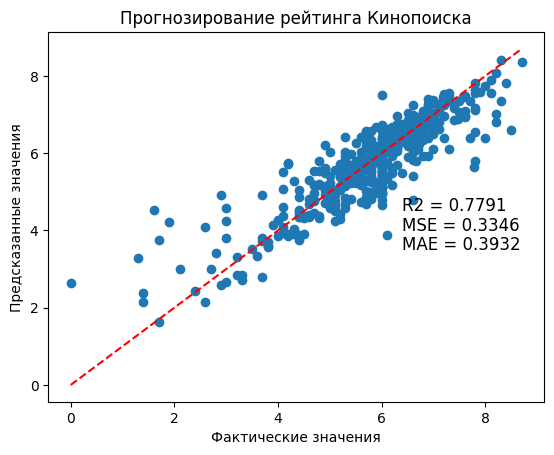

In [45]:
# Вывод графика
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.text(6.4, 4.5, 'R2 = {:.4f}'.format(r2), fontsize=12)
plt.text(6.4, 4.0, 'MSE = {:.4f}'.format(mse), fontsize=12)
plt.text(6.4, 3.5, 'MAE = {:.4f}'.format(mae), fontsize=12)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Прогнозирование рейтинга Кинопоиска")
plt.show()